# Head to head policy test

In [1]:
import time
begin_start_time = time.time()
time_str = time.strftime('%Y-%m-%d %H-%M-%S', time.localtime(begin_start_time))
print(time_str)

2026-01-08 07-29-02


In [2]:
import torch, pandas as pd, os
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)

Device: cuda


In [3]:
from PPO.ppo_agent_eval import head_to_head_models, plot_winrate_bar
from DQN.h2h_to_excel import append_h2h_to_excel
from C4.eval_oppo_dict import *
from C4.CNet192 import CNet192, save_cnet192, load_cnet192
import pprint

In [4]:
pathA=  "PPO_Models/MIX_57a.pt"
pathB = "PPO_Models/MIX_57b.pt"

#pathB = "SupervisedModels/EXPERT_2.pt"
#pathA = "SupervisedModels/EXPERT_5.pt"

labelA = pathA.split("/")[-1].split(".")[0]
labelB = pathB.split("/")[-1].split(".")[0]

A, _ = load_cnet192(pathA, device=DEVICE, strict=True)
B, _ = load_cnet192(pathB, device=DEVICE, strict=True)
A.eval()
B.eval()

CNet192(
  (conv1): Conv2d(1, 192, kernel_size=(4, 4), stride=(1, 1))
  (conv_mid): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(192, 192, kernel_size=(2, 2), stride=(1, 1))
  (fc): Linear(in_features=1152, out_features=192, bias=True)
  (policy_fc): Linear(in_features=192, out_features=192, bias=True)
  (policy_out): Linear(in_features=192, out_features=7, bias=True)
  (value_fc): Linear(in_features=192, out_features=192, bias=True)
  (value_out): Linear(in_features=192, out_features=1, bias=True)
)

In [5]:
GAMES = 3000
res = head_to_head_models(
    A, B,
    n_games=GAMES,
    A_label=labelA,
    B_label=labelB,
    device=DEVICE,
    opening_noise_k=OPENING_NOISE_K,
    seed=666,
    progress=True,
    paired_openings=True,
    opening_bias="center",   # or "uniform"
)

MIX_57a vs MIX_57b:   0%|          | 0/3000 [00:00<?, ?it/s]

In [6]:
pprint.pprint(res)
print(f"\nA score = {res['A_score_rate']:.3f}  (95% CI {res['A_score_CI95'][0]:.3f}–{res['A_score_CI95'][1]:.3f})")

{'A_losses': 1465,
 'A_path': 'MIX_57a',
 'A_score_CI95': (0.49115543849943993, 0.5268445615005601),
 'A_score_rate': 0.509,
 'A_wins': 1519,
 'B_path': 'MIX_57b',
 'draws': 16,
 'games': 3000,
 'opening_bias': 'center',
 'opening_noise_k': {0: 0.85, 1: 0.1, 2: 0.05},
 'paired_openings': True}

A score = 0.509  (95% CI 0.491–0.527)


(<Figure size 620x160 with 1 Axes>, <Figure size 480x320 with 1 Axes>)

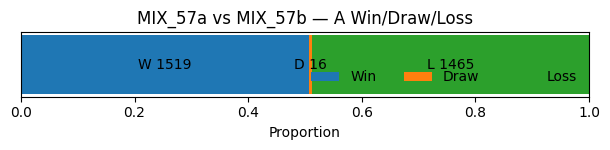

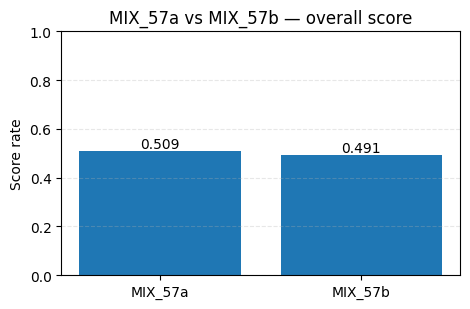

In [7]:
plot_winrate_bar(res)

In [8]:
append_h2h_to_excel(res)

In [9]:
end_time = time.time()
total_elapsed = (end_time - begin_start_time) / 60
print(f"Evaluation completed in {total_elapsed:.1f} minutes")

Evaluation completed in 0.9 minutes
